# Concrete Strength Regression Models

## Overview
We will investigate the strength of concrete and the relationships of age, water components, etc. and create regression models to predict the strength of concrete. 

### Data
The data is imported from Kaggle and is originally sourced from Prof. I-Cheng Yeh at Chung-Hua University. Here is a link to the original source: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

### Checking and Cleaning the Data

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/kashi/OneDrive/Desktop/concrete/Concrete_Data_Yeh.csv")
df.head()
df.describe()

In [2]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

There are no null values in any of the columns or any negative values. We can proceed to split the data for training and testing.

### Training/Testing Data
We drop the csMPa column which is the variable that we are observing as a result of independent variables. Concrete compressive strength is csMPa.

In [3]:
x = df.drop('csMPa', axis = 1)
x

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [4]:
y = df.csMPa
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: csMPa, Length: 1030, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Load Libraries for Linear Model

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score



In [7]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred_train = model.predict(x_train)


print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, y_pred_train))
     

Coefficients: [ 0.11616728  0.10144884  0.08801227 -0.154249    0.32624353  0.01852167
  0.02079838  0.1179909 ]
Intercept: -22.626709752505427
Mean squared error (MSE): 105.41
Coefficient of determination (R^2): 0.62


From the linear model, we find that the MSE is very high and the coefficient of determination is not close to 1. Therefore, a linear model is not a good fit for the data. We find this in the testing data as well.

In [9]:
y_pred_test = model.predict(x_test)
     

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred_test))

Coefficients: [ 0.11616728  0.10144884  0.08801227 -0.154249    0.32624353  0.01852167
  0.02079838  0.1179909 ]
Intercept: -22.626709752505427
Mean squared error (MSE): 115.56
Coefficient of determination (R^2): 0.59


### Lineaer Model Plot

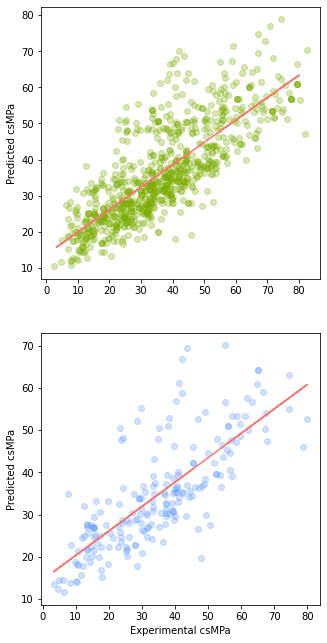

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=y_train, y=y_pred_train, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted csMPa')


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=y_test, y=y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted csMPa')
plt.xlabel('Experimental csMPa')

plt.savefig('plot_vertical_logS.png')
plt.savefig('plot_vertical_logS.pdf')
plt.show()

From the plots above we see that the linear regression model is not a good fit for the data.

### Install Libraries for Random Forest

In [12]:
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
pip install numpy==1.21 --user

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.ensemble import RandomForestRegressor

### Correlation Heat Map
We see below that cement, age, and fly ash have the highest correlations with the strength of the cement.

<AxesSubplot:>

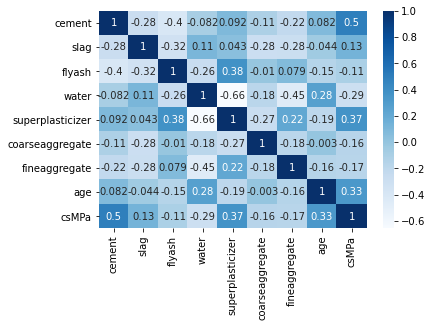

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

### Random Forest Model

In [52]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 12)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=12)

Text(0, 0.5, 'Prediction')

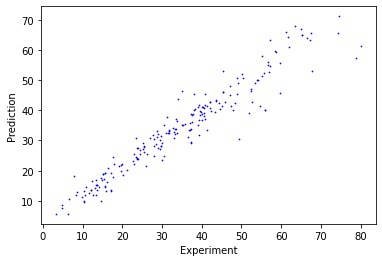

In [53]:
pred = regressor.predict(x_test)

plt.scatter(y_test, pred, c='b', s=0.5)
plt.xlabel('Experiment')
plt.ylabel('Prediction')

In [54]:
mse = mean_squared_error(y_test, pred)
rmse = mse**.5
print(mse)
print(rmse)

23.41097499061836
4.838488916037564


The Mean-Squared Error for the random forest is much lower than the linear model. The linear model had a MSE of 115 while the random forest only has 23.4. Therefore we can conclude that the random forest is a better model to predict the strength of the cement than a linear model.